In [1]:
import pandas as pd
dataset = pd.read_csv('6.3.5.csv', sep=';')
dataset

,Rok,ZiskMimoTurSez,ZiskTurSez
0,1990,189000,152000
1,1991,22000,2259000
2,1992,78000,116000
3,1993,56000,372000
4,1994,221000,80000
5,1995,54000,364000
6,1996,22000,641000
7,1997,26000,471000
8,1998,56000,150000
9,1999,183000,2146000


In [2]:
dataset['ZiskMimoTurSez'] = dataset['ZiskMimoTurSez']/1000
dataset['ZiskMimoTurSez'] = dataset['ZiskMimoTurSez'].astype(int)
dataset['ZiskTurSez'] = dataset['ZiskTurSez']/1000
dataset['ZiskTurSez'] = dataset['ZiskTurSez'].astype(int)
dataset

,Rok,ZiskMimoTurSez,ZiskTurSez
0,1990,189,152
1,1991,22,2259
2,1992,78,116
3,1993,56,372
4,1994,221,80
5,1995,54,364
6,1996,22,641
7,1997,26,471
8,1998,56,150
9,1999,183,2146


In [3]:
dataset['Zisk'] = dataset[['ZiskMimoTurSez','ZiskTurSez']].values.tolist()
dataset['X'] = dataset['Rok'] -1989
dataset['Z'] = '0, 1'
dataset['Z'] = dataset['Z'].str.split(",")
dataset

,Rok,ZiskMimoTurSez,ZiskTurSez,Zisk,X,Z
0,1990,189,152,"[189, 152]",1,"[0, 1]"
1,1991,22,2259,"[22, 2259]",2,"[0, 1]"
2,1992,78,116,"[78, 116]",3,"[0, 1]"
3,1993,56,372,"[56, 372]",4,"[0, 1]"
4,1994,221,80,"[221, 80]",5,"[0, 1]"
5,1995,54,364,"[54, 364]",6,"[0, 1]"
6,1996,22,641,"[22, 641]",7,"[0, 1]"
7,1997,26,471,"[26, 471]",8,"[0, 1]"
8,1998,56,150,"[56, 150]",9,"[0, 1]"
9,1999,183,2146,"[183, 2146]",10,"[0, 1]"


In [4]:
dataset = dataset.drop(['ZiskMimoTurSez', 'ZiskTurSez'], axis=1)
dataset = dataset.explode(['Zisk', 'Z'])
dataset

,Rok,Zisk,X,Z
0,1990,189,1,0
0,1990,152,1,1
1,1991,22,2,0
1,1991,2259,2,1
2,1992,78,3,0
2,1992,116,3,1
3,1993,56,4,0
3,1993,372,4,1
4,1994,221,5,0
4,1994,80,5,1


C:\Users\andre\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


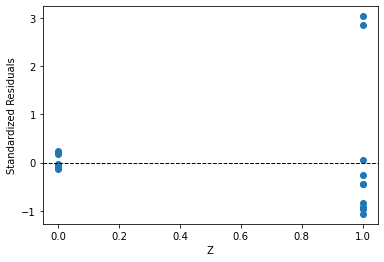

In [5]:
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

dataset["Zisk"] = pd.to_numeric(dataset.Zisk, errors='coerce')
dataset["Z"] = pd.to_numeric(dataset.Z, errors='coerce')
dataset.apply(lambda col:pd.to_numeric(col, errors='coerce'))
dataset.dtypes

y = dataset['Zisk']
x = dataset[['X', 'Z']]

x = sm.add_constant(x)
model = sm.OLS(y, x).fit() 

influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal

plt.scatter(dataset.Z, standardized_residuals)
plt.xlabel('Z')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

In [6]:
from numpy import log as ln
import math
dataset['Y'] = ln(dataset['Zisk'].astype('float'))

Data máme upravené, teraz zistíme, či majú rezíduá rovnaký rozptyl.

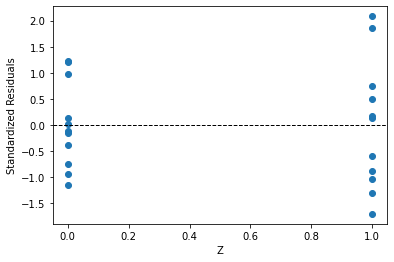

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     5.975
Date:                Mon, 27 Mar 2023   Prob (F-statistic):            0.00970
Time:                        18:29:36   Log-Likelihood:                -31.637
No. Observations:                  22   AIC:                             69.27
Df Residuals:                      19   BIC:                             72.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3157      0.553      7.799      0.000       3.157       5.474
X             -0.0338      0.074     -0.457      0.653      -0.189       0.121
Z              1.6025      0.468      3.427      0.003       0.624       2.581
==============================================================================
Omnibus:                        1.059   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.589   Jarque-Bera (JB):                0.994
Skew:                           0.372   Prob(JB):                        0.608
Kurtosis:                       2.271   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
y = dataset['Y']
x = dataset[['X', 'Z']]

x = sm.add_constant(x)
model = sm.OLS(y, x).fit() 

influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal

plt.scatter(dataset.Z, standardized_residuals)
plt.xlabel('Z')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

model.summary()

In [8]:
dataset_nezavisle = dataset[['X', 'Z']].copy()
corr = dataset_nezavisle.corr()
corr.style.background_gradient(cmap='coolwarm')

,X,Z
X,1.000000,0.000000
Z,0.000000,1.000000
